<a href="https://colab.research.google.com/github/darwinyusef/aimoderna/blob/master/Creative/Creative_AI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# TAREA #1: ENTENDER EL ENUNCIADO DEL PROBLEMA Y EL CASO PRÁCTICO


![alt text](https://drive.google.com/uc?id=1EW5NEV_lA6qAIpb1ZCzRMyZq9zjo9_Gr)

![alt text](https://drive.google.com/uc?id=1G5O6Jv7YOXlHFD2DcVh-LQZeXGDf-anK)

![alt text](https://drive.google.com/uc?id=1bP_KVLVqFTRCUlVuw5Mbl10s7aQ-n5_e)

![alt text](https://drive.google.com/uc?id=14ICl2il9FI3oHU7vAswV0zBdPCInr42q)

# TAREA #2: IMPORTAR LIBRERÍAS Y DATASETS

In [ ]:
!pip install tensorflow==2.8.0

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 497.6/497.6 MB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.8/5.8 MB 37.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 462.5/462.5 kB 38.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 66.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 54.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 781.3/781.3 kB 48.8 MB/s eta 0:00:00
  Attempting uninstall: keras
    Found existing installation: keras 2.12.0
    Uninstalling keras-2.12.0:
      Successfully uninstalled keras-2.12.0
  Attempting uninstall: tensorboard-data-server
    Found existing installation: tensorboard-data-server 0.7.1
    Uninstalling tensorboard-data-server-0.7.1:
      Successfully uninstalled tensorboard-data-server-0.7.1
  Attempting uninstall: google-auth-oauthlib
    Found existing insta

In [ ]:
import tensorflow as tf

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import os
import PIL.Image
import cv2
from PIL import Image # Python Image Library es una librería que añade soporte para abrir, manipular
                      # y guardar diferentes formatos de imágenes

In [ ]:
tf.__version__

'2.8.0'

In [ ]:
# Necesitaremos montar su disco usando los siguientes comandos:
# Para obtener más información sobre el montaje, puedes consultar: https://stackoverflow.com/questions/46986398/import-data-into-google-colaboratory

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Cargamos el modelo Inception entrenado, para obtener más información sobre el aprendizaje de transferencia, consulte los casos de estudio anteriores
base_model = tf.keras.applications.InceptionV3(include_top = False, weights = 'imagenet')

MINI RETO #1:
- ¿Cuántos parámetros totales existen en Inception V3?
- Establecer include top = True e indicar cuántos parámetros totales existen ahora.

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                    

# TAREA #3: OBTENER UNA IMAGEN Y PROCESARLA

In [ ]:
# Abrir la primera imagen
# Fuente: https://www.pxfuel.com/en/free-photo-xxgfs
img_1 = Image.open("/content/drive/My Drive/Curso de Masterclass en IA Moderna/5. Creative AI/mars.jpg")

# Abrir la segunda imagen
# Fuente: https://commons.wikimedia.org/wiki/File:Georges_Garen_embrasement_tour_Eiffel.jpg
img_2 = Image.open('/content/drive/My Drive/Curso de Masterclass en IA Moderna/5. Creative AI/eiffel.jpg')

# Fusionar ambas imágenes

image = Image.blend(img_1, img_2, 0.5) # alpha --> El factor alfa de interpolación. Si alfa es 0.0, se devuelve una copia de la primera imagen.
# Si alpha es 1.0, se devuelve una copia de la segunda imagen.

# Guardamos la mezcla
image.save("img_0.jpg")

In [ ]:
# Cargamos la imagen
Sample_Image = tf.keras.preprocessing.image.load_img('img_0.jpg')

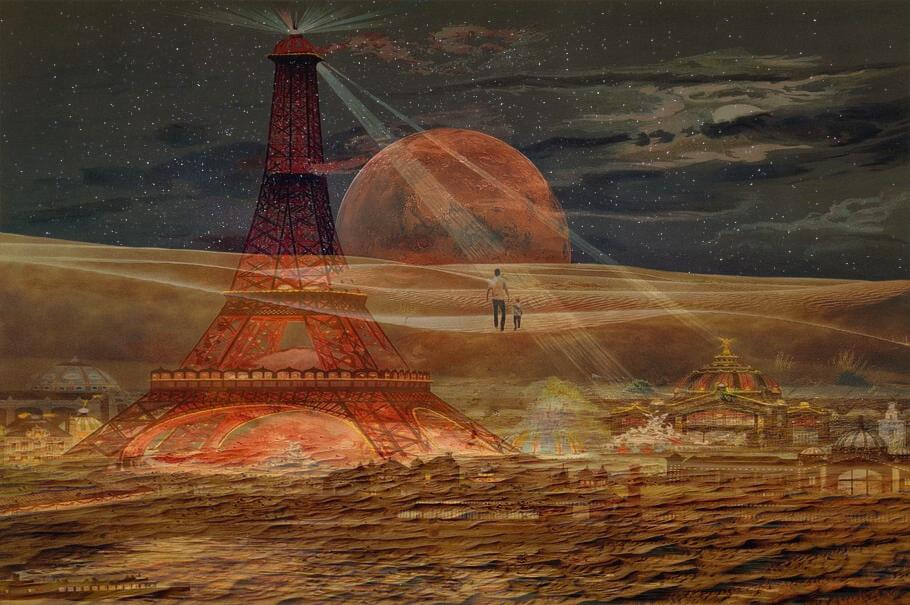

In [ ]:
Sample_Image

In [ ]:
# Obtenemos el tamaño de la imagen
np.shape(Sample_Image)

(605, 910, 3)

In [ ]:
# Comprobamos el tipo de la imagen
type(Sample_Image)

PIL.JpegImagePlugin.JpegImageFile

In [ ]:
# Convertimos a array de numpy
Sample_Image = tf.keras.preprocessing.image.img_to_array(Sample_Image)

# Sample_Image = np.array(Sample_Image)

In [ ]:
# Confirmanis que la imagen se convierte en una matriz de Numpy
type(Sample_Image)

numpy.ndarray

In [ ]:
# Obtenemos los valores mínimos y máximos
print('Mínimo valor de píxel = {}, Máximo valor de píxel = {}'.format(Sample_Image.min(), Sample_Image.max()))

Mínimo valor de píxel = 0.0, Máximo valor de píxel = 255.0


In [ ]:
# Normalizar la imagen de entrada
Sample_Image = np.array(Sample_Image)/255.0
Sample_Image.shape

(605, 910, 3)

In [ ]:
# LVerificamos los valores normalizados!
print('Mínimo valor de píxel = {}, Máximo valor de píxel = {}'.format(Sample_Image.min(), Sample_Image.max()))

Mínimo valor de píxel = 0.0, Máximo valor de píxel = 1.0


In [ ]:
Sample_Image = tf.expand_dims(Sample_Image, axis = 0)

In [ ]:
np.shape(Sample_Image)

TensorShape([1, 605, 910, 3])

MINI RETO #2:
- Realizar lo opuesto a expandir dimensión
- Representar la imagen

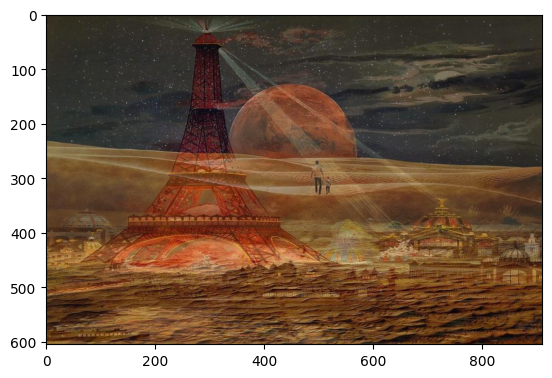

In [ ]:
plt.imshow(np.squeeze(Sample_Image))

In [ ]:
np.shape(np.squeeze(Sample_Image))

(605, 910, 3)

# TAREA #4: EJECUTAR EL MODELO PRETRENADO Y EXPLORAR LAS ACTIVACIONES

# NOTAS:
- Seleccionamos una capa e intentamos maximizar la pérdida que son las activaciones generadas por la capa de interés.
- Podemos seleccionar cualquier capa que elijamos, las primeras capas generan características simples como bordes y las capas profundas generan características más complejas como cara completa, carro o árbol.
- La red de inicio tiene múltiples capas concatenadas llamadas 'mixtas'

In [ ]:
base_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                    

In [ ]:
# Vamos a maximizar la activación de estas capas

names = ['mixed3', 'mixed5', 'mixed7']

layers = [base_model.get_layer(name).output for name in names]

# Creamos el modelo de extracción de Características
deepdream_model = tf.keras.Model(inputs = base_model.input, outputs = layers)

In [ ]:
deepdream_model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, None, None,  0           []                               
                                 3)]                                                              
                                                                                                  
 conv2d (Conv2D)                (None, None, None,   864         ['input_1[0][0]']                
                                32)                                                               
                                                                                                  
 batch_normalization (BatchNorm  (None, None, None,   96         ['conv2d[0][0]']                 
 alization)                     32)                                                           

In [ ]:
# Ejecutamos el modelo suministrando la imagen de entrada y echando un ojo a las activaciones de las neuronas de salida
activations = deepdream_model(Sample_Image)
activations

[<tf.Tensor: shape=(1, 36, 55, 768), dtype=float32, numpy=
 array([[[[0.        , 0.        , 0.        , ..., 0.        ,
           0.28813234, 0.30937192],
          [0.        , 0.3302809 , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.16165757, 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          [0.        , 0.        , 0.        , ..., 0.37070048,
           0.        , 0.        ],
          [0.03587092, 0.        , 0.        , ..., 0.37070048,
           0.64610916, 0.        ]],
 
         [[0.7529492 , 0.        , 0.        , ..., 0.        ,
           0.16688873, 0.7020401 ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.3031866 ],
          [0.        , 0.        , 0.        , ..., 0.        ,
           0.        , 0.        ],
          ...,
        

In [ ]:
len(activations)

3

MINI RETO #3:
- Genera las activaciones para una capa más profunda como 'mixed8' y 'mixed9'.
- ¿Cuál es el tamaño de las activaciones generadas?
- Combina 4 activaciones de capas del inicio y más profundas como 'mixed3', 'mixed5', 'mixed8', 'mixed9'

# TAREA #5: COMPRENDER CÓMO FUNCIONA EL ALGORITMO DEL SUEÑO PROFUNDO

![alt text](https://drive.google.com/uc?id=1t2KKXDFClBOqlcgXI-Rjd4VRGbFCXp-s)

Fuente #1: https://www.topbots.com/advanced-topics-deep-convolutional-neural-networks/

Fuente #2: https://wccftech.com/nvidia-demo-skynet-gtc-2014-neural-net-based-machine-learning-intelligence/

![alt text](https://drive.google.com/uc?id=1Nz0RMYQ2CKQT0DesABUz_gDXZUuOMqBK)

![alt text](https://drive.google.com/uc?id=1ZrF1Y44o4Msh6IrcM-Od7lnGZe8Vum1f)

![alt text](https://drive.google.com/uc?id=1cl6lhjbEpA9eVGPsuCKON8b_bK98D8aZ)

![alt text](https://drive.google.com/uc?id=1s0M71nqMDVGcvi4H5DcpdB0Gp30E5bsW)

# TAREA # 6: COMPRENDER CÓMO REALIZAR EL CÁLCULO DE GRADIENTES Y TF.GRADIENTTAPE()

- tf.GradientTape () se usa para registrar operaciones para diferenciación automática
- Por ejemplo, supongamos que tenemos las siguientes funciones $y = x^3$.
- El gradiente en $x = 2$ se puede calcular de la siguiente manera: $\frac{dy}{dx} = 3 \cdot x ^ 2 = 3 \cdot 2 ^ 2 = 12$.

In [ ]:
x = tf.constant(2.0)

In [ ]:
with tf.GradientTape() as g:
  g.watch(x)
  y = x * x * x
dy_dx = g.gradient(y, x) # Nos va a dar 12

In [ ]:
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=12.0>

MINI RETO #4:
- Usando tf.GradientTape (), calcula el gradiente de $y = x ^ 4 + x ^ 5$ en $x = 5$
- Verifica la respuesta diferenciando manualmente la ecuación

In [ ]:
x = tf.constant(5.0)

In [ ]:
with tf.GradientTape() as g:
  g.watch(x)
  y = (x * x * x * x) + (x * x * x * x * x)
dy_dx = g.gradient(y, x)
dy_dx

<tf.Tensor: shape=(), dtype=float32, numpy=3625.0>

# TAREA #7: IMPLEMENTAR EL ALGORITMO DEL SUEÑO PROFUNDO - PASO #1 CÁLCULO DE PÉRDIDAS

- CRÉDITOS: El código DeepDream ha sido adoptado de la documentación de Keras:
- https://www.tensorflow.org/tutorials/generative/deepdream

In [ ]:
# Dado que la función cal_closs incluye expandir dimensión, aplanamos primero la imagen (reduce_dims)
Sample_Image.shape

TensorShape([1, 605, 910, 3])

In [ ]:
Sample_Image = tf.squeeze(Sample_Image, axis = 0)

In [ ]:
Sample_Image.shape

TensorShape([605, 910, 3])

In [ ]:
def calc_loss(image, model):
# Función utilizada para cálculos de pérdidas
# Funciona transmitiendo la imagen de entrada a través de la red y generando activaciones
# Luego se obtiene el promedio y la suma de esas salidas

  img_batch = tf.expand_dims(image, axis=0) # Convert into batch format
  layer_activations = model(img_batch) # Run the model
  print('ACTIVATION VALUES (LAYER OUTPUT) =\n', layer_activations)
  # print('ACTIVATION SHAPE =\n', np.shape(layer_activations))

  losses = [] # acumulador para contener todas las pérdidas
  for act in layer_activations:
    loss = tf.math.reduce_mean(act) # calcular la media de cada activación
    losses.append(loss)

  print('LOSSES (FROM MULTIPLE ACTIVATION LAYERS) = ', losses)
  print('LOSSES SHAPE (FROM MULTIPLE ACTIVATION LAYERS) = ', np.shape(losses))
  print('SUM OF ALL LOSSES (FROM ALL SELECTED LAYERS)= ', tf.reduce_sum(losses))

  return  tf.reduce_sum(losses) # Calcula la suma

In [ ]:
loss = calc_loss(tf.Variable(Sample_Image), deepdream_model)

ACTIVATION VALUES (LAYER OUTPUT) =
 [<tf.Tensor: shape=(1, 36, 55, 768), dtype=float32, numpy=
array([[[[0.        , 0.        , 0.        , ..., 0.        ,
          0.28813234, 0.30937192],
         [0.        , 0.3302809 , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.16165757, 0.        , ..., 0.        ,
          0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.37070048,
          0.        , 0.        ],
         [0.03587092, 0.        , 0.        , ..., 0.37070048,
          0.64610916, 0.        ]],

        [[0.7529492 , 0.        , 0.        , ..., 0.        ,
          0.16688873, 0.7020401 ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.3031866 ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
       

In [ ]:
loss # Suma de las pérdidas de ambas activaciones

<tf.Tensor: shape=(), dtype=float32, numpy=0.55780554>

MINI RETO #5:
- ¿Cuál es la suma de todas las pérdidas cuando la capa 'mixta3' es la única capa utilizada para la generación de activaciones?

# TAREA #8: IMPLEMENTAR EL ALGORITMO DEL SUEÑO PROFUNDO - PASO #2 (CALCULAR EL GRADIENTE)

- En este paso, nos basaremos en la pérdida que se ha calculado en el paso anterior y calcularemos el gradiente con respecto a la imagen de entrada dada y luego lo agregaremos a la imagen original de entrada.
- ¡Hacerlo de forma iterativa dará como resultado imágenes de alimentación que excitan de manera continua y creciente a las neuronas y generan más imágenes de ensueño!

In [ ]:
# Cuando se anota una función con tf.function, la función se puede llamar como cualquier otra función definida por Python.
# El beneficio es que se compilará en un gráfico, por lo que será mucho más rápido y podría ejecutarse sobre TPU / GPU

@tf.function
def deepdream(model, image, step_size):
    with tf.GradientTape() as tape:
      # Se necesitas gradientes con respecto a `img`
      # `GradientTape` solo permite watch de `tf.Variable`s por defecto
      tape.watch(image)
      loss = calc_loss(image, model) # Se llama a la función de cálculo de pérdidas

    # Calculamos el gradiente de la pérdida con respecto a los píxeles de la imagen de entrada.
    # La sintaxis es la siguiente: dy_dx = g.gradient (y, x)
    gradients = tape.gradient(loss, image)

    print('GRADIENTS =\n', gradients)
    print('GRADIENTS SHAPE =\n', np.shape(gradients))

    # tf.math.reduce_std calcula la desviación estándar de elementos en las dimensiones de un tensor
    gradients /= tf.math.reduce_std(gradients)

    # En el gradiente ascendente, la "pérdida" se maximiza de modo que la imagen de entrada "excita" cada vez más las capas.
    # Puede actualizar la imagen agregando directamente los gradientes (¡porque tienen la misma forma!)
    image = image + gradients * step_size
    image = tf.clip_by_value(image, -1, 1)

    return loss, image

In [ ]:
def run_deep_dream_simple(model, image, steps = 100, step_size = 0.01):
  # Se convierte de uint8 al rango esperado por el modelo.
  image = tf.keras.applications.inception_v3.preprocess_input(image)

  for step in range(steps):
    loss, image = deepdream(model, image, step_size)

    if step % 100 == 0:
      plt.figure(figsize=(12,12))
      plt.imshow(deprocess(image))
      plt.show()
      print ("Step {}, loss {}".format(step, loss))

  # clear_output(wait=True)
  plt.figure(figsize=(12,12))
  plt.imshow(deprocess(image))
  plt.show()

  return deprocess(image)

In [ ]:
def deprocess(image):
  image = 255*(image + 1.0)/2.0
  return tf.cast(image, tf.uint8)


In [ ]:
Sample_Image.shape

TensorShape([605, 910, 3])

In [ ]:
!pip install --upgrade pip


In [ ]:
!pip uninstall numpy

Found existing installation: numpy 1.23.5
Uninstalling numpy-1.23.5:
  Would remove:
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.10
    /usr/local/lib/python3.10/dist-packages/numpy-1.23.5.dist-info/*
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libgfortran-040039e1.so.5.0.0
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libopenblas64_p-r0-742d56dc.3.20.so
    /usr/local/lib/python3.10/dist-packages/numpy.libs/libquadmath-96973f99.so.0.0.0
    /usr/local/lib/python3.10/dist-packages/numpy/*
Proceed (Y/n)? Y
  Successfully uninstalled numpy-1.23.5


In [ ]:
!pip install numpy==1.19.0

  Using cached numpy-1.19.0.zip (7.3 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [ ]:
# Cargamos la imagen nuevamente y la convertimos a una matriz Numpy
Sample_Image = np.array(tf.keras.preprocessing.image.load_img('img_0.jpg'))
dream_img = run_deep_dream_simple(model = deepdream_model, image = Sample_Image, steps = 4000, step_size = 0.001)


ACTIVATION VALUES (LAYER OUTPUT) =
 [<tf.Tensor 'model/mixed3/concat:0' shape=(1, 36, 55, 768) dtype=float32>, <tf.Tensor 'model/mixed5/concat:0' shape=(1, 36, 55, 768) dtype=float32>, <tf.Tensor 'model/mixed7/concat:0' shape=(1, 36, 55, 768) dtype=float32>]
LOSSES (FROM MULTIPLE ACTIVATION LAYERS) =  [<tf.Tensor 'Mean:0' shape=() dtype=float32>, <tf.Tensor 'Mean_1:0' shape=() dtype=float32>, <tf.Tensor 'Mean_2:0' shape=() dtype=float32>]


NotImplementedError: ignored

# TAREA # 9: (VIDEO) APLICAR DEEPDREAM PARA GENERAR UNA SERIE DE IMÁGENES

In [ ]:
image = tf.keras.preprocessing.image.load_img("img_0.jpg")

In [ ]:
plt.imshow(image)

In [ ]:
# Nombre de la carpeta
dream_name = 'mars_eiffel'

In [ ]:
# Dimensión del fundido

x_size = 910 # cuanto más grande es la imagen va a tomar más tiempo para generar los frames
y_size = 605

In [ ]:
# Definimos los contadores
created_count = 0
max_count = 50

In [ ]:
# Esta función auxiliar carga una imagen y la devuelve como un array de numpy de puntos flotantes

def load_image(filename):
    image = PIL.Image.open(filename)
    return np.float32(image)

In [ ]:
for i in range(0, 50):
    # Asegúrate de crear una nueva carpeta titulada 'mars_eiffel' y coloca img_0 en ella
     # Accede al directorio de sueños y busque la cantidad de imágenes y luego averigua cuál es la última imagen. De ahí este
     # imagen con la que vamos a empezar y dejar que sueñe una y otra vez
    if os.path.isfile('/content/drive/MyDrive/Curso de Masterclass en IA Moderna/5. Creative AI/{}/img_{}.jpg'.format(dream_name, i+1)):
        print("{} present already, continue fetching the frames...".format(i+1))

    else:
        # Llamamos a la función de cargar imagen
        img_result = load_image(r'/content/drive/MyDrive/Curso de Masterclass en IA Moderna/5. Creative AI/{}/img_{}.jpg'.format(dream_name, i))


        # Zoom en la imagen
        x_zoom = 2 # indicamos el poder del zoom
        y_zoom = 1

        # Cortamos los bordes de la imagen y cambie el tamaño de la imagen a la forma original. Esto da los cambios visuales de un zoom.
        img_result = img_result[0+x_zoom : y_size-y_zoom, 0+y_zoom : x_size-x_zoom]
        img_result = cv2.resize(img_result, (x_size, y_size))

        # Ajustar el valor RGB de la imagen
        img_result[:, :, 0] += 2  # red
        img_result[:, :, 1] += 2  # green
        img_result[:, :, 2] += 2  # blue

        # Modelo Deep Dream
        img_result = run_deep_dream_simple(model = deepdream_model, image = img_result, steps = 500, step_size = 0.001)

        # Recortamos la imagen, convertimos el tipo de datos de la matriz y luego en una imagen real.
        img_result = np.clip(img_result, 0.0, 255.0)
        img_result = img_result.astype(np.uint8)
        result = PIL.Image.fromarray(img_result, mode='RGB')

        # Guardamos los frames en la misma localización
        result.save(r'/content/drive/MyDrive/Curso de Masterclass en IA Moderna/5. Creative AI/{}/img_{}.jpg'.format(dream_name, i+1))

        created_count += 1
        if created_count > max_count:
            break

# TAREA #10: (VIDEO) CREAR UN VIDEO DE TODAS LOS FOTOS

In [ ]:
from google.colab import files
uploaded = files.upload()

In [ ]:
# Descomprimimos el fichero

from zipfile import ZipFile
file_name = "mars_eiffel.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

In [ ]:
# Path a todos los frames

dream_path = 'mars_eiffel'

In [ ]:
import cv2
# Definimos el códec y creamos el objeto VideoWriter
# Descarga FFmpeg

fourcc = cv2.VideoWriter_fourcc(*'XVID') # FourCC es un código de 4 bytes que se utiliza para especificar el códec de video

out = cv2.VideoWriter('deepdreamvideo.avi', fourcc , 5.0, (910, 605)) # Especifique el FourCC, fotogramas por segundo (fps),
                                                                      # y tamaño del frame
# El valor de fotogramas por segundo depende de algunas cosas importantes
# 1. El número de fotogramas que hemos creado. Una menor cantidad de frames trae pequeños fps
# 2. Cuanto mayor sea la imagen, mayor será el valor de fps. Por ejemplo, una imagen de 1080 píxeles puede traer 60 fps

In [ ]:
import os
for i in range(9999999999999):

    # Entramos al directorio de sueños y buscamos la cantidad de imágenes y luego averiguamos cuál es la última imagen. Por lo tanto con
     # esta imagen con la que vamos a empezar y dejarla soñar una y otra vez
    if os.path.isfile('mars_eiffel/img_{}.jpg'.format(i+1)):
        pass
    # Averiguamos como de largo es el sueño
    else:
        dream_length = i
        break

In [ ]:
dream_length

In [ ]:
for i in range(dream_length):

    # Construimos los frames con cv2.VideoWriter
    img_path = os.path.join(dream_path,'img_{}.jpg'.format(i)) # juntamos el path al sueño

    print(img_path) # Imprimimos el path

    frame = cv2.imread(img_path)
    out.write(frame)

out.release()

# BUEN TRABAJO!!

# SOLUCIONES A LOS MINI RETOS

MINI RETO #1:
- ¿Cuántos parámetros totales existen en Inception V3?
- Establecer include top = True e indicar cuántos parámetros totales existen ahora.

In [ ]:
Total Params = 23,851,784 (include Top = True)
Total params: 21,802,784 (include Top = False)

MINI RETO #2:

In [ ]:
plt.imshow(np.squeeze(Sample_Image))

MINI RETO #3:
- Genera las activaciones para una capa más profunda como 'mixed8' y 'mixed9'.
- ¿Cuál es el tamaño de las activaciones generadas?
- Combina 4 activaciones de capas del inicio y más profundas como 'mixed3', 'mixed5', 'mixed8', 'mixed9'

In [ ]:
names = ['mixed8', 'mixed9']
# shape=(1, 13, 21, 1280)
names = ['mixed3', 'mixed5', 'mixed8', 'mixed9']

MINI RETO #4:
- Usando tf.GradientTape (), calcula el gradiente de $y = x ^ 4 + x ^ 5$ en $x = 5$
- Verifica la respuesta diferenciando manualmente la ecuación

In [ ]:
x = tf.constant(5.0)
with tf.GradientTape() as g:
  g.watch(x)
  y = (x * x * x * x) + (x * x * x * x * x)
dy_dx = g.gradient(y, x) # Tiene que dar 12
dy_dx

In [ ]:
# 500+3125 = 3625

MINI RETO #5:
- ¿Cuál es la suma de todas las pérdidas cuando la capa 'mixta3' es la única capa utilizada para la generación de activaciones?

In [ ]:
# <tf.Tensor: shape=(), dtype=float32, numpy=0.36584973>